In [24]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [40]:
#prepare the dataset
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=10.0, random_state=42)


In [26]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

In [27]:
n_samples, n_features = X.shape

In [28]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [38]:
learning_rate = 0.001
n_iters = 100

In [30]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate )

epoch: 9 
loss: 78.0543
epoch: 19 
loss: 78.0542
epoch: 29 
loss: 78.0543
epoch: 39 
loss: 78.0542
epoch: 49 
loss: 78.0543
epoch: 59 
loss: 78.0542
epoch: 69 
loss: 78.0542
epoch: 79 
loss: 78.0542
epoch: 89 
loss: 78.0542
epoch: 99 
loss: 78.0543


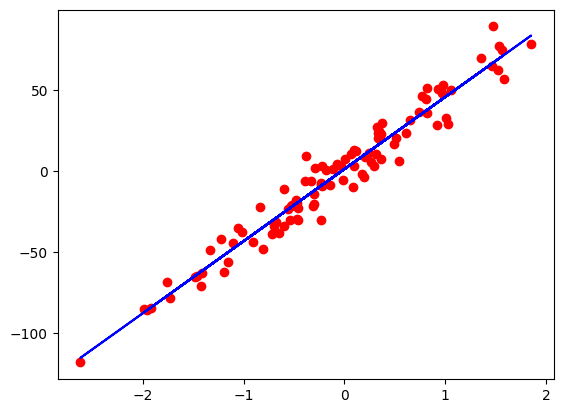

In [39]:
for epoch in range(n_iters):
    y_predict = model(X)

    loss = criterion(y_predict, y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0: 
        print(f'epoch: {epoch} ')
        print(f'loss: {loss.item():.4f}')


#plot
predicted = model(X).detach()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()


Dự đoán luôn luôn tạo ra một đường thẳng 


Dữ liệu gốc bị rải rác xung quanh một đường thẳng lý tưởng. Nhưng mô hình sẽ cố học ra đường thẳng tốt nhất khớp với toàn bộ dữ 

liệu đó, bằng cách giảm lỗi bình phương trung bình (MSE).

Linear Regression là một mô hình đơn giản, lời giải cho phương trình đạo hàm bằng 0 cũng khá đơn giản. Trong hầu hết các trường 

hợp, chúng ta không thể giải được phương trình đạo hàm bằng 0.

Nhưng có một điều chúng ta nên nhớ, còn tính được đạo hàm là còn có hy vọng.

Khi đạo hàm tồn tại, ta biết được hướng đi để cải thiện mô hình (ý tưởng của gradient descent).

Nó như việc “còn nhìn thấy được ánh sáng thì còn biết đường mà đi”.

Ngược lại, khi hàm không khả vi, hoặc gradient không tồn tại, thì quá trình tối ưu hóa trở nên cực kỳ khó khăn.

